In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt,os
print("Setup OK:", np.__version__, pd.__version__)


Setup OK: 2.2.4 2.2.3


In [2]:
import sys
print(sys.executable)


C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe


In [3]:
import os, glob, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

def mse(y_true, y_pred):
    y_true = y_true.reshape(-1, 1); y_pred = y_pred.reshape(-1, 1)
    return float(np.mean((y_true - y_pred)**2))

def rmse(y_true, y_pred):
    return float(np.sqrt(mse(y_true, y_pred)))

def r2_score(y_true, y_pred):
    y_true = y_true.reshape(-1, 1); y_pred = y_pred.reshape(-1, 1)
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return float(1 - ss_res/ss_tot)

def train_test_split(X, y, test_size=0.2, seed=42):
    rng = np.random.default_rng(seed)
    idx = np.arange(len(y))
    rng.shuffle(idx)
    n_test = int(len(y) * test_size)
    test_idx = idx[:n_test]
    train_idx = idx[n_test:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

def standardize(X):
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
    sigma[sigma == 0] = 1.0
    Xs = (X - mu) / sigma
    return Xs, mu, sigma

def add_intercept(X):
    return np.hstack([np.ones((X.shape[0], 1)), X])


In [4]:
data_dir = os.path.join("..", "data")
csv_candidates = glob.glob(os.path.join(data_dir, "*.csv"))
assert len(csv_candidates) >= 1, "Put the dataset CSV into life_expectancy_task/data/"
csv_path = csv_candidates[0]
csv_path


'..\\data\\Life Expectancy.csv'

In [5]:
df = pd.read_csv(csv_path)
print("Shape:", df.shape)
display(df.head(10))
df.info()
df[df.select_dtypes(include="number").columns].describe()



Shape: (2497, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Hungary,2009,Developed,74.2,162.0,0,11.46,1281.155944,NaN,1,61.1,1,99.0,7.55,99.0,0.1,12967.165430,12265.0,1.8,1.8,0.816,15.3
1,Singapore,2010,Developed,82.0,61.0,0,1.84,4540.543752,96.0,50,31.8,0,96.0,3.96,96.0,0.1,46569.679510,NaN,2.1,2.1,0.889,14.5
2,New Zealand,2008,Developed,81.0,75.0,0,9.49,6761.288966,9.0,0,63.8,0,89.0,1.70,89.0,0.1,31287.778650,NaN,0.3,0.3,0.894,19.5
3,Honduras,2000,Developing,71.0,174.0,6,2.61,28.808311,93.0,0,38.8,8,88.0,6.63,94.0,1.7,188.783165,6524283.0,2.8,2.7,0.551,9.8
4,Egypt,2002,Developing,68.7,177.0,61,0.15,0.000000,97.0,653,51.8,75,97.0,5.97,97.0,0.1,NaN,NaN,3.4,3.4,0.617,11.2
5,Jordan,2003,Developing,72.3,127.0,4,0.54,228.783811,97.0,76,56.3,4,97.0,9.15,97.0,0.1,1889.213962,5396774.0,3.9,3.9,0.717,13.2
6,Bosnia and Herzegovina,2010,Developing,76.4,94.0,0,4.54,630.388356,89.0,45,53.1,0,9.0,9.58,89.0,0.1,4611.472980,372284.0,2.6,2.6,0.717,13.3
7,Fiji,2007,Developing,68.6,29.0,0,2.09,5.889526,99.0,0,56.6,0,99.0,3.74,99.0,0.1,478.823270,834812.0,4.1,3.8,0.698,14.2
8,Germany,2003,Developed,78.5,9.0,3,11.92,582.615703,9.0,779,56.6,4,96.0,1.62,97.0,0.1,3359.952150,82534176.0,1.1,1.1,0.872,16.3
9,Albania,2000,Developing,72.6,11.0,1,3.66,91.711541,96.0,662,45.0,1,97.0,6.26,97.0,0.1,1175.788981,38927.0,2.1,2.2,0.656,10.7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2497 entries, 0 to 2496
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2497 non-null   object 
 1   Year                             2497 non-null   int64  
 2   Status                           2497 non-null   object 
 3   Life expectancy                  2488 non-null   float64
 4   Adult Mortality                  2488 non-null   float64
 5   infant deaths                    2497 non-null   int64  
 6   Alcohol                          2333 non-null   float64
 7   percentage expenditure           2497 non-null   float64
 8   Hepatitis B                      2016 non-null   float64
 9   Measles                          2497 non-null   int64  
 10   BMI                             2466 non-null   float64
 11  under-five deaths                2497 non-null   int64  
 12  Polio               

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2497.000000,2488.000000,2488.000000,2497.000000,2333.000000,2497.000000,2016.000000,2497.000000,2466.000000,2497.000000,2481.000000,2306.000000,2481.000000,2497.000000,2132.000000,1.957000e+03,2466.000000,2466.000000,2356.000000,2360.000000
mean,2007.479375,69.143770,164.647508,28.987185,4.577008,731.548870,81.008433,2431.130156,38.092863,40.258710,82.419589,5.936544,82.240226,1.699199,7348.579392,1.313189e+07,4.818613,4.863058,0.625069,11.959534
std,4.616338,9.517112,124.080010,107.624711,4.056307,1987.075471,25.107816,11740.711517,20.098019,147.252113,23.703581,2.493682,23.914151,4.898429,14143.733665,6.507472e+07,4.375821,4.484728,0.213123,3.380734
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.400000,0.000000,3.000000,0.370000,2.000000,0.100000,3.685949,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,63.200000,74.000000,0.000000,0.850000,5.347718,77.000000,0.000000,19.100000,0.000000,78.000000,4.252500,78.000000,0.100000,458.064238,1.822860e+05,1.600000,1.525000,0.489750,10.100000
50%,2007.000000,72.000000,144.000000,3.000000,3.670000,64.398533,92.000000,17.000000,43.000000,4.000000,93.000000,5.750000,93.000000,0.100000,1683.750332,1.354493e+06,3.300000,3.300000,0.676500,12.300000
75%,2011.000000,75.525000,227.000000,22.000000,7.680000,437.105966,96.000000,383.000000,56.100000,28.000000,97.000000,7.530000,97.000000,0.800000,5858.119655,7.472819e+06,7.200000,7.200000,0.780000,14.200000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
na_counts = df.isna().sum().sort_values(ascending=False)
display(na_counts.to_frame("missing_count").head(20))

na_pct = (df.isna().mean() * 100).sort_values(ascending=False)
display(na_pct.to_frame("missing_%").head(20))


,missing_count
Population,540
Hepatitis B,481
GDP,365
Total expenditure,191
Alcohol,164
Income composition of resources,141
Schooling,137
thinness 1-19 years,31
thinness 5-9 years,31
BMI,31


,missing_%
Population,21.625951
Hepatitis B,19.263116
GDP,14.617541
Total expenditure,7.649179
Alcohol,6.567881
Income composition of resources,5.646776
Schooling,5.486584
thinness 1-19 years,1.241490
thinness 5-9 years,1.241490
BMI,1.241490


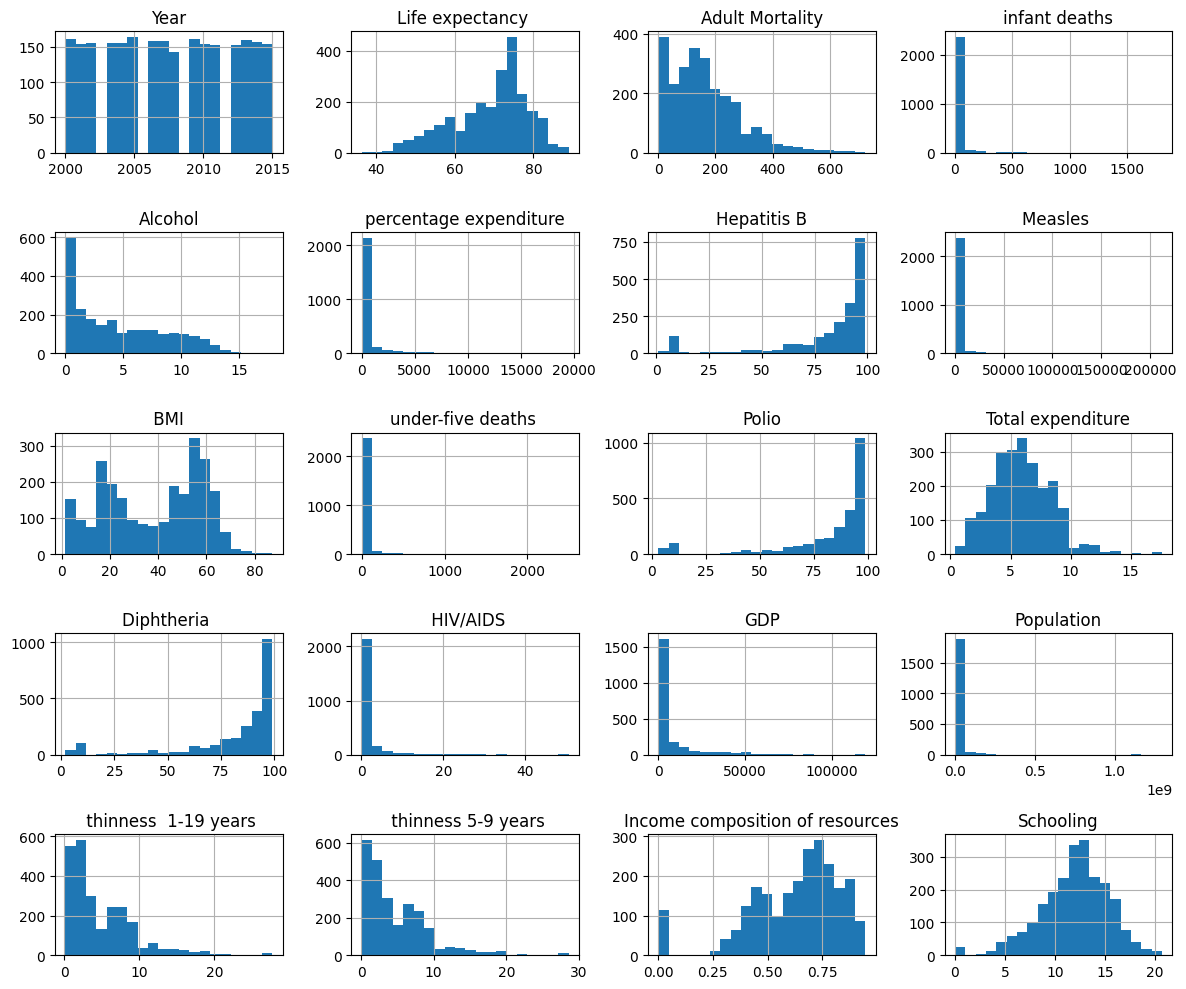

In [7]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[num_cols].hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()


,skew,abs_skew,skewness_flag
Population,17.187220,17.187220,high
Measles,9.692571,9.692571,high
infant deaths,9.599046,9.599046,high
under-five deaths,9.362827,9.362827,high
HIV/AIDS,5.380028,5.380028,high
percentage expenditure,4.733441,4.733441,high
GDP,3.556492,3.556492,high
thinness 5-9 years,1.774765,1.774765,high
thinness 1-19 years,1.709954,1.709954,high
Adult Mortality,1.191990,1.191990,high


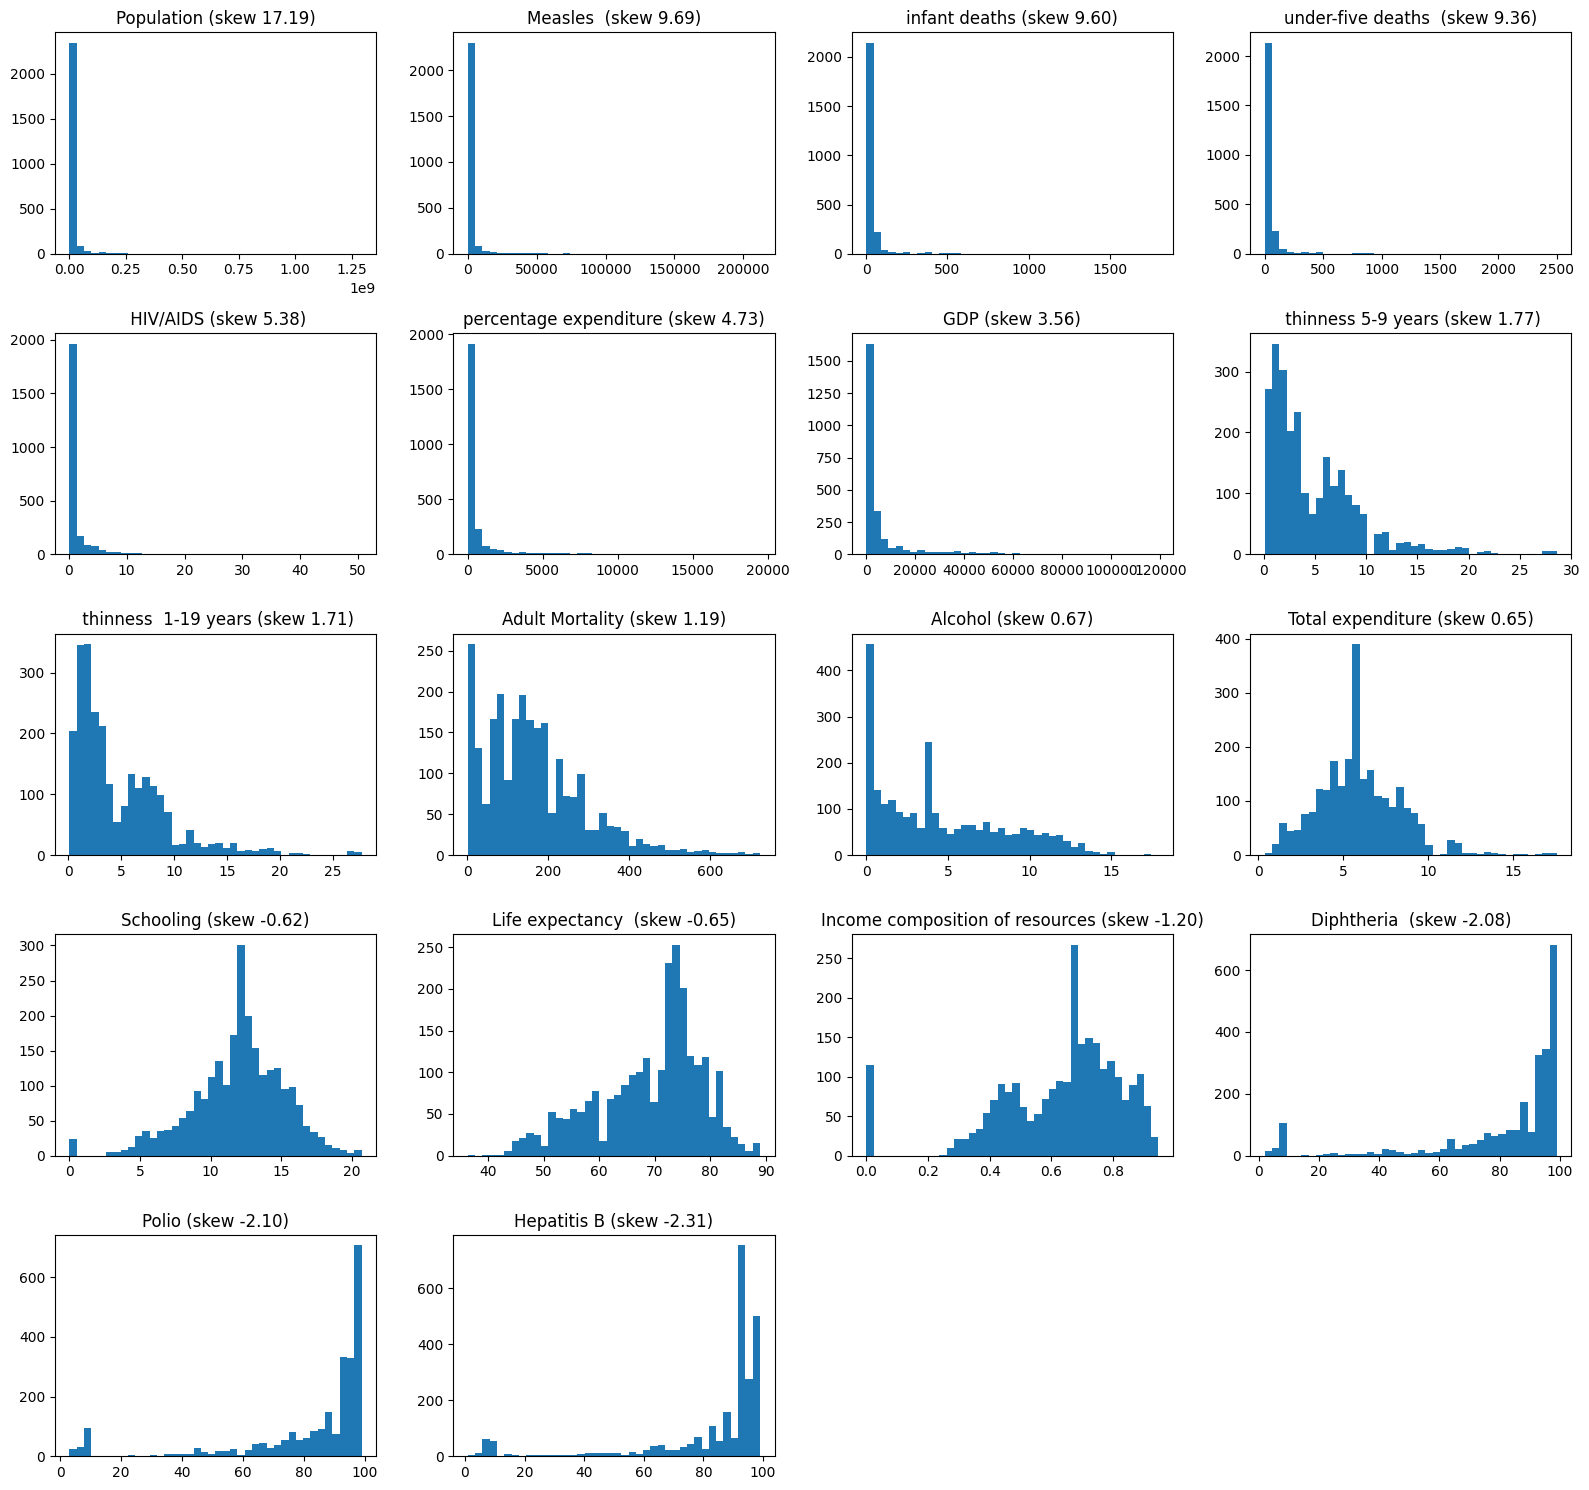

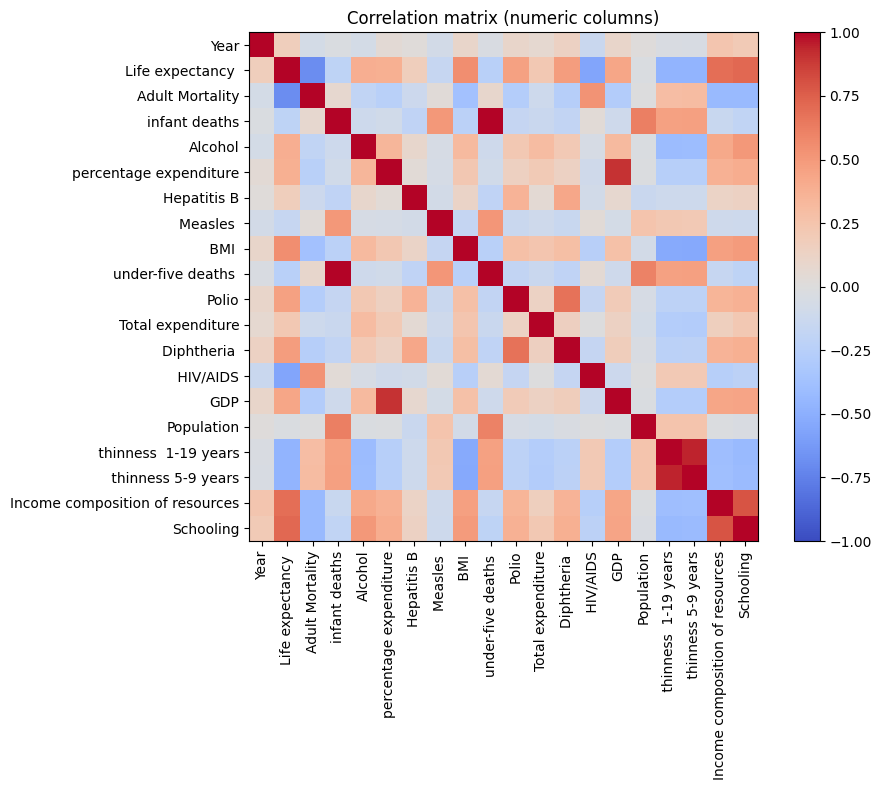

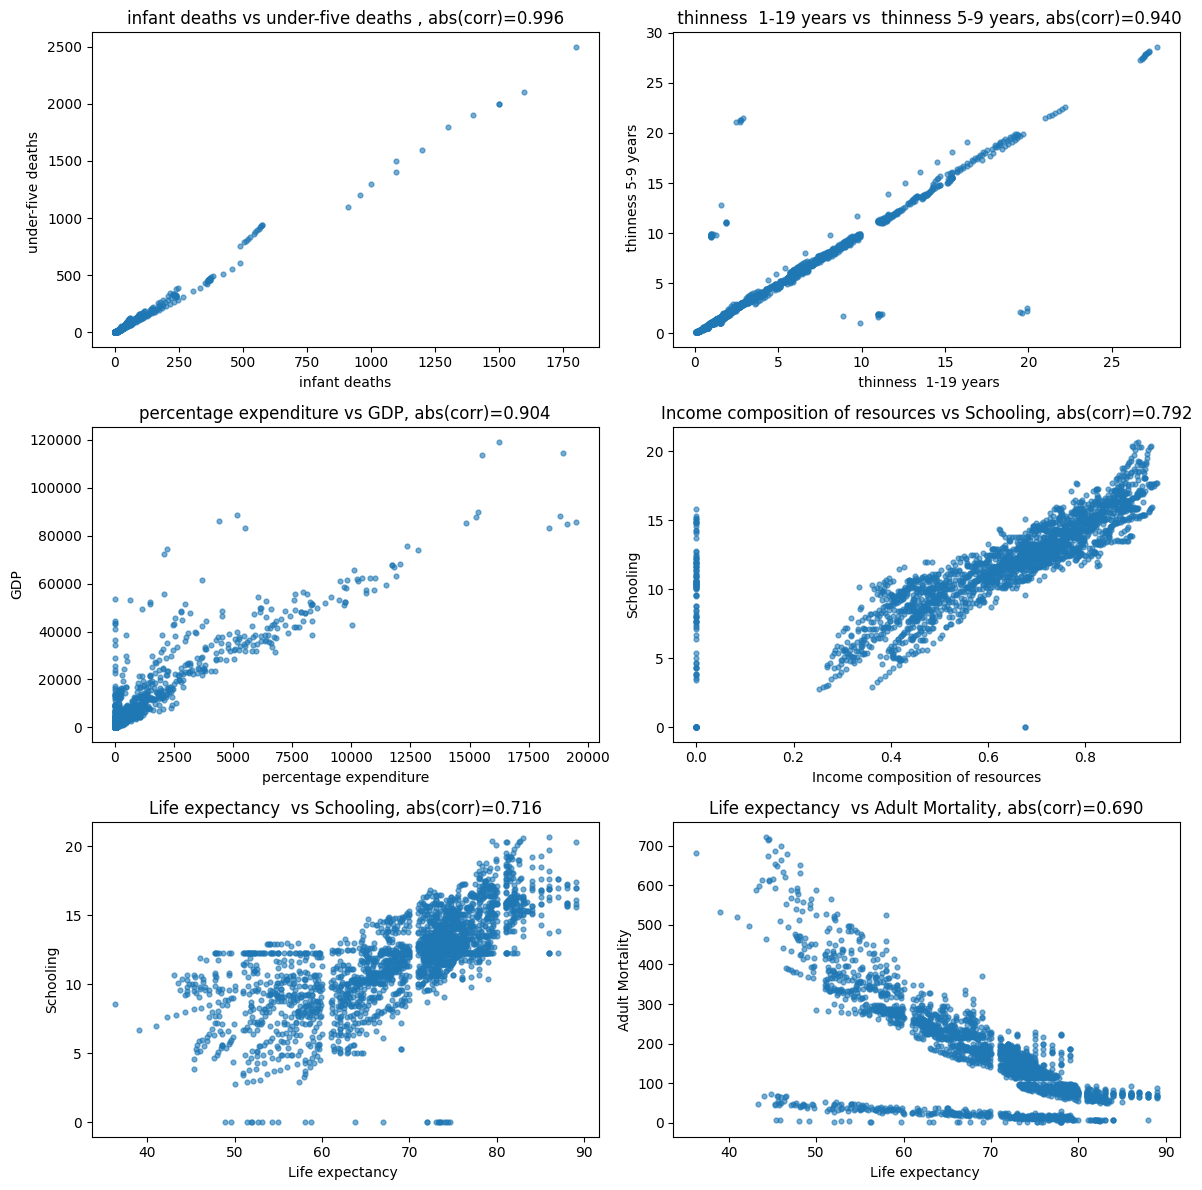

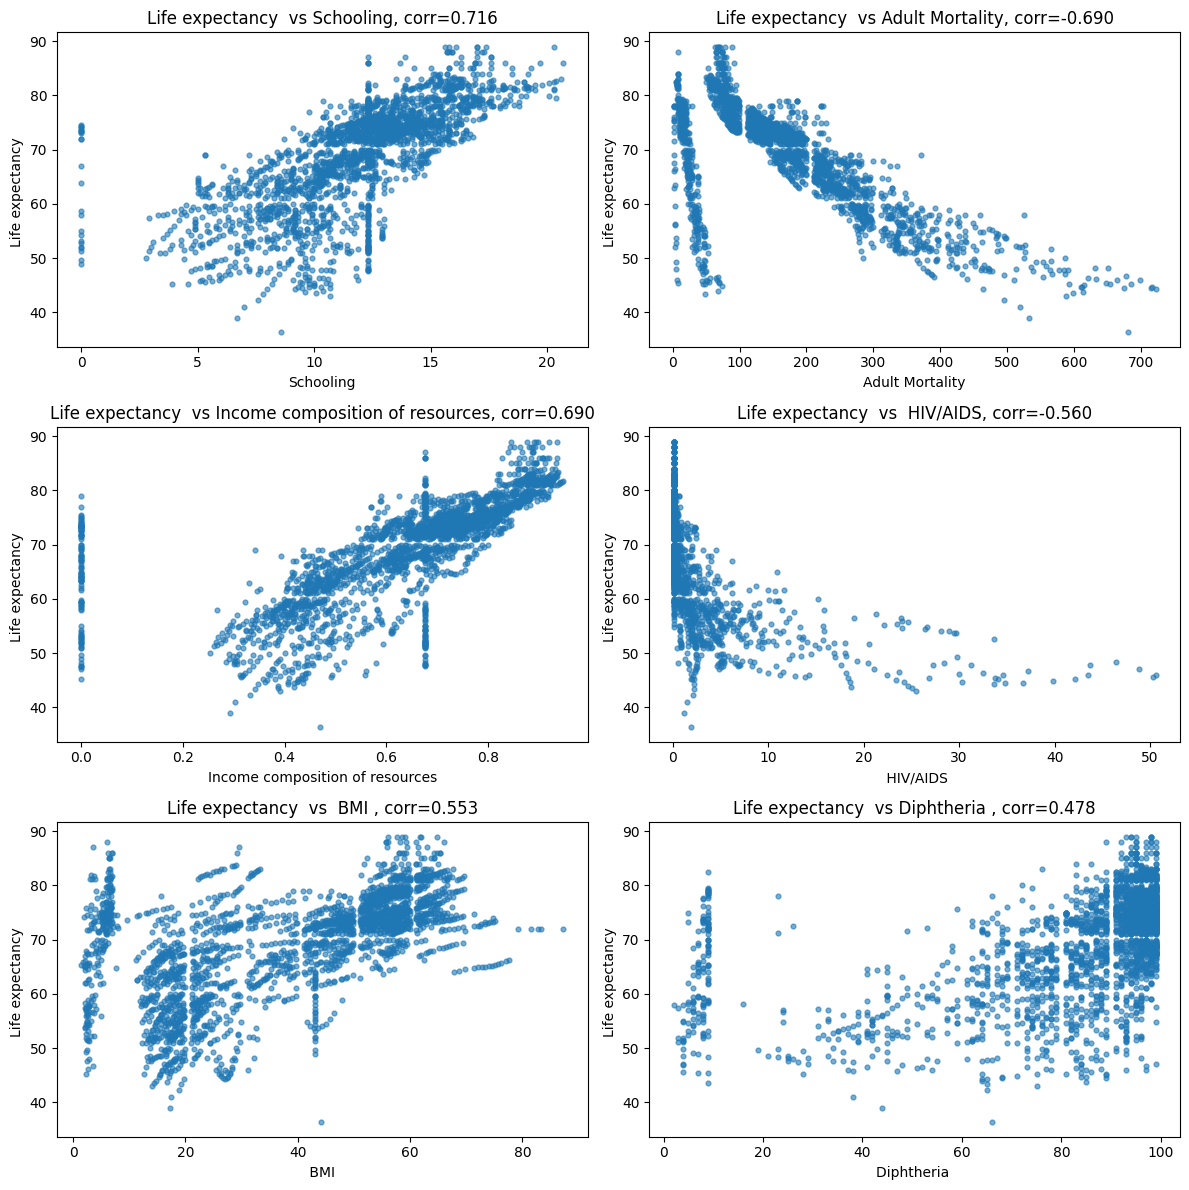

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    import seaborn as sns
    _have_sns = True
except Exception:
    _have_sns = False

if 'df' not in globals():
    _skip_eda = True
else:
    _skip_eda = False

if not _skip_eda:
    if 'target_col' in globals() and target_col in df.columns:
        pass
    else:
        possible_targets = [c for c in df.columns if "life" in c.lower() and "expect" in c.lower()]
        target_col = possible_targets[0] if possible_targets else None

    df_imputed = df.copy()
    num_cols = df_imputed.select_dtypes(include=[np.number]).columns.tolist()
    for col in num_cols:
        if df_imputed[col].isna().any():
            med = df_imputed[col].median()
            df_imputed[col] = df_imputed[col].fillna(med)

    skew_vals = df_imputed[num_cols].skew().sort_values(ascending=False)
    skew_flag = pd.DataFrame({
        "skew": skew_vals,
        "abs_skew": skew_vals.abs()
    })
    skew_flag["skewness_flag"] = skew_flag["abs_skew"].apply(
        lambda v: "high" if v > 1.0 else ("moderate" if v > 0.5 else "low")
    )
    display(skew_flag.head(30))

    skewed = skew_flag[skew_flag["skewness_flag"].isin(["high", "moderate"])].index.tolist()
    if skewed:
        n = len(skewed)
        cols = min(4, n)
        rows = (n + cols - 1) // cols
        plt.figure(figsize=(4 * cols, 3 * rows))
        for i, cname in enumerate(skewed, 1):
            plt.subplot(rows, cols, i)
            plt.hist(df_imputed[cname].dropna(), bins=40)
            plt.title(f"{cname} (skew {skew_vals[cname]:.2f})")
        plt.tight_layout()
        plt.show()

    corr = df_imputed[num_cols].corr()
    plt.figure(figsize=(10, 8))
    if _have_sns:
        sns.heatmap(corr, vmin=-1, vmax=1, cmap="coolwarm", center=0, square=True)
    else:
        plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
        plt.colorbar()
        plt.xticks(range(len(corr)), corr.columns, rotation=90)
        plt.yticks(range(len(corr)), corr.columns)
    plt.title("Correlation matrix (numeric columns)")
    plt.tight_layout()
    plt.show()

    c_abs = corr.abs().copy()
    np.fill_diagonal(c_abs.values, 0)
    pairs = []
    cols_list = list(c_abs.columns)
    for i, col_i in enumerate(cols_list):
        for j in range(i + 1, len(cols_list)):
            col_j = cols_list[j]
            pairs.append((c_abs.iloc[i, j], col_i, col_j))
    pairs_sorted = sorted(pairs, key=lambda x: x[0], reverse=True)

    top_n = 6
    top_pairs = pairs_sorted[:top_n]

    if top_pairs:
        cols = 2
        rows = (len(top_pairs) + cols - 1) // cols
        plt.figure(figsize=(6 * cols, 4 * rows))
        for i, (val, a, b) in enumerate(top_pairs, 1):
            plt.subplot(rows, cols, i)
            plt.scatter(df_imputed[a], df_imputed[b], s=12, alpha=0.6)
            plt.xlabel(a)
            plt.ylabel(b)
            plt.title(f"{a} vs {b}, abs(corr)={val:.3f}")
        plt.tight_layout()
        plt.show()


    if target_col is not None and target_col in corr.columns:
        tgt_corr = corr[target_col].abs().sort_values(ascending=False)
        tgt_corr = tgt_corr.drop(labels=[target_col], errors="ignore")
        top_feats = tgt_corr.index[:6].tolist()
        if top_feats:
            cols = 2
            rows = (len(top_feats) + cols - 1) // cols
            plt.figure(figsize=(6 * cols, 4 * rows))
            for i, f in enumerate(top_feats, 1):
                plt.subplot(rows, cols, i)
                plt.scatter(df_imputed[f], df_imputed[target_col], s=12, alpha=0.6)
                plt.xlabel(f)
                plt.ylabel(target_col)
                plt.title(f"{target_col} vs {f}, corr={corr.loc[f, target_col]:.3f}")
            plt.tight_layout()
            plt.show()


    df = df_imputed.copy()


In [9]:
possible_targets = [c for c in df.columns if "life" in c.lower() and "expect" in c.lower()]
print("Guessed target(s):", possible_targets)
target_col = possible_targets[0]  

corr = df[num_cols].corr(numeric_only=True)[target_col].sort_values(ascending=False)
display(corr.to_frame("corr_with_target"))


Guessed target(s): ['Life expectancy ']


,corr_with_target
Life expectancy,1.000000
Schooling,0.716055
Income composition of resources,0.689798
BMI,0.552518
Diphtheria,0.477659
Polio,0.460439
GDP,0.432702
Alcohol,0.386766
percentage expenditure,0.381532
Total expenditure,0.213945


In [10]:
features = [c for c in num_cols if c != target_col]

df1 = df.dropna(subset=[target_col]).copy()

for c in features:
    if df1[c].isna().any():
        df1[c] = df1[c].fillna(df1[c].median())

X = df1[features].to_numpy().astype(float)
y = df1[target_col].to_numpy().astype(float).reshape(-1, 1)

Xs, mu, sigma = standardize(X)

Xsi = add_intercept(Xs)

Xsi.shape, y.shape


((2497, 20), (2497, 1))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(Xsi, y, test_size=0.2, seed=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1998, 20), (499, 20), (1998, 1), (499, 1))

In [12]:
theta = np.linalg.pinv(X_train.T @ X_train) @ (X_train.T @ y_train)

y_pred_train = X_train @ theta
y_pred_test  = X_test  @ theta

print("Train MSE:", mse(y_train, y_pred_train))
print("Train RMSE:", rmse(y_train, y_pred_train))
print("Train R^2:", r2_score(y_train, y_pred_train))
print("---")
print("Test MSE :", mse(y_test, y_pred_test))
print("Test RMSE:", rmse(y_test, y_pred_test))
print("Test R^2 :", r2_score(y_test, y_pred_test))


Train MSE: 16.70837062928537
Train RMSE: 4.087587384911223
Train R^2: 0.819515650013023
---
Test MSE : 13.919595847037606
Test RMSE: 3.7308974586602623
Test R^2 : 0.8278591215001306


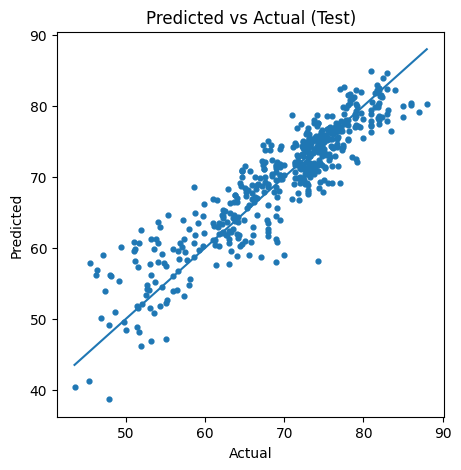

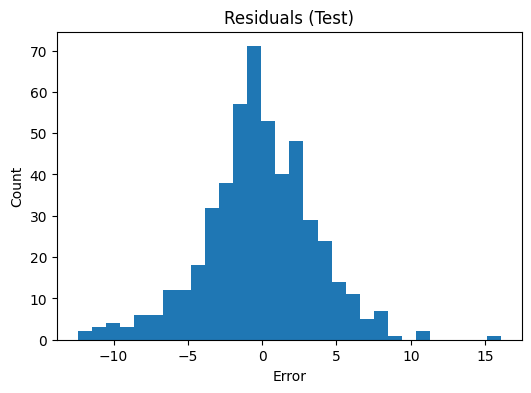

In [13]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred_test, s=12)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual (Test)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.show()

residuals = (y_test - y_pred_test).ravel()
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30)
plt.title("Residuals (Test)")
plt.xlabel("Error")
plt.ylabel("Count")


plt.show()


In [14]:
import os, sys
sys.path.append(os.path.join("..", "src"))

import data_preprocessing as dp

Xsi2, y2, feat_names, stats = dp.basic_numeric_preprocess(df, target_col)
print(Xsi2.shape, y2.shape)


(2497, 20) (2497, 1)


In [15]:
import numpy as np

class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.theta = None
        self.history = []

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros((n, 1))  

        for i in range(self.n_iter):
            gradients = (1/m) * X.T @ (X @ self.theta - y)
            self.theta -= self.learning_rate * gradients

            cost = (1/(2*m)) * np.sum((X @ self.theta - y)**2)
            self.history.append(cost)

        return self

    def predict(self, X):
        return X @ self.theta


In [16]:
model = LinearRegressionGD(learning_rate=0.01, n_iter=1000)
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)

print("Test MSE:", mse(y_test, y_pred_test))
print("Test RMSE:", rmse(y_test, y_pred_test))
print("Test R²:", r2_score(y_test, y_pred_test))


Test MSE: 14.526300231578931
Test RMSE: 3.81133837799518
Test R²: 0.8203561288204334


In [17]:
corr = df[num_cols].corr()
print(corr)

                                     Year  Life expectancy   Adult Mortality  \
Year                             1.000000          0.169480        -0.068156   
Life expectancy                  0.169480          1.000000        -0.690245   
Adult Mortality                 -0.068156         -0.690245         1.000000   
infant deaths                   -0.027184         -0.207763         0.073404   
Alcohol                         -0.068307          0.386766        -0.189949   
percentage expenditure           0.039282          0.381532        -0.239227   
Hepatitis B                      0.022768          0.167695        -0.119399   
Measles                         -0.077203         -0.161363         0.025146   
 BMI                             0.101250          0.552518        -0.371491   
under-five deaths               -0.034339         -0.235431         0.088098   
Polio                            0.094379          0.460439        -0.268178   
Total expenditure                0.06560

In [18]:
import numpy as np

def mse(y_true, y_pred):
    return float(np.mean((y_true - y_pred) ** 2))

def rmse(y_true, y_pred):
    return float(np.sqrt(mse(y_true, y_pred)))

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return float(1 - ss_res/ss_tot)

def k_fold_split(X, y, k=5, seed=42):
    rng = np.random.default_rng(seed)
    idx = np.arange(len(y))
    rng.shuffle(idx)
    folds = np.array_split(idx, k)
    return folds


In [19]:
class LinearRegressionNormalEq:
    def __init__(self): self.theta = None
    def fit(self, X, y):
        self.theta = np.linalg.pinv(X.T @ X) @ (X.T @ y)
        return self
    def predict(self, X):
        return X @ self.theta


In [20]:
class PolynomialRegression:
    def __init__(self, degree=2):
        self.degree = degree
        self.theta = None

    def _poly_features(self, X):
  
        feats = [X]
        for d in range(2, self.degree+1):
            feats.append(X ** d)
        return np.hstack(feats)

    def fit(self, X, y):
        Xp = self._poly_features(X)
        Xpi = np.hstack([np.ones((Xp.shape[0], 1)), Xp])
        self.theta = np.linalg.pinv(Xpi.T @ Xpi) @ (Xpi.T @ y)
        self.X_shape = X.shape[1]
        return self

    def predict(self, X):
        Xp = self._poly_features(X)
        Xpi = np.hstack([np.ones((Xp.shape[0], 1)), Xp])
        return Xpi @ self.theta


In [21]:
class RidgeRegression:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.theta = None

    def fit(self, X, y):
        n = X.shape[1]
        I = np.eye(n)
        I[0,0] = 0 
        self.theta = np.linalg.pinv(X.T @ X + self.alpha * I) @ (X.T @ y)
        return self

    def predict(self, X):
        return X @ self.theta


In [22]:
class LassoRegression:
    def __init__(self, alpha=0.1, n_iter=1000):
        self.alpha = alpha
        self.n_iter = n_iter
        self.theta = None


    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros((n, 1))
        for _ in range(self.n_iter):
            for j in range(n):
               
                y_pred = X @ self.theta
                r_j = y - (y_pred - X[:, [j]] * self.theta[j])

                rho = X[:, [j]].T @ r_j

                if j == 0:  
                    self.theta[j] = rho / (X[:, [j]].T @ X[:, [j]])
                else:
                    if rho < -self.alpha/2:
                        self.theta[j] = (rho + self.alpha/2) / (X[:, [j]].T @ X[:, [j]])
                    elif rho > self.alpha/2:
                        self.theta[j] = (rho - self.alpha/2) / (X[:, [j]].T @ X[:, [j]])
                    else:
                        self.theta[j] = 0
        return self

    def predict(self, X):
        return X @ self.theta


In [23]:
def cross_validate(model_class, X, y, k=5, **kwargs):
    folds = k_fold_split(X, y, k=k)
    r2_scores, mse_scores, rmse_scores = [], [], []

    for i in range(k):
        val_idx = folds[i]
        train_idx = np.hstack([folds[j] for j in range(k) if j != i])

        X_train, y_train = X[train_idx], y[train_idx]
        X_val, y_val = X[val_idx], y[val_idx]

        model = model_class(**kwargs).fit(X_train, y_train)
        y_pred = model.predict(X_val)

        r2_scores.append(r2_score(y_val, y_pred))
        mse_scores.append(mse(y_val, y_pred))
        rmse_scores.append(rmse(y_val, y_pred))

    return (
        np.mean(r2_scores), r2_scores,
        np.mean(mse_scores), mse_scores,
        np.mean(rmse_scores), rmse_scores
    )

In [26]:
import numpy as np

class ElasticNetRegression:
    def __init__(self, lambda1=0.1, lambda2=0.1, n_iter=1000):
        self.lambda1 = lambda1
        self.lambda2 = lambda2
        self.n_iter = n_iter
        self.theta = None

    def fit(self, X, y):
        m, n = X.shape
        y = y.reshape(-1, 1)  # ensure column vector
        self.theta = np.zeros((n, 1))

        for _ in range(self.n_iter):
            for j in range(n):
                # partial residual excluding feature j
                y_pred = X @ self.theta
                r_j = y - (y_pred - X[:, [j]] * self.theta[j])

                rho = X[:, [j]].T @ r_j

                if j == 0:  
                    # intercept: no penalty
                    self.theta[j] = rho / (X[:, [j]].T @ X[:, [j]])
                else:
                    # soft-thresholding with L1 and L2 penalties
                    denom = (X[:, [j]].T @ X[:, [j]]) + self.lambda2
                    if rho < -self.lambda1 / 2:
                        self.theta[j] = (rho + self.lambda1 / 2) / denom
                    elif rho > self.lambda1 / 2:
                        self.theta[j] = (rho - self.lambda1 / 2) / denom
                    else:
                        self.theta[j] = 0
        return self

    def predict(self, X):
        return X @ self.theta


In [27]:
models = [
    ("Linear", LinearRegressionNormalEq, {}),
    ("Poly deg=2", PolynomialRegression, {"degree":2}),
    ("Poly deg=3", PolynomialRegression, {"degree":3}),
    ("Ridge α=1", RidgeRegression, {"alpha":1.0}),
    ("Lasso α=0.1", LassoRegression, {"alpha":0.01, "n_iter":500}),
    ("ElasticNet", ElasticNetRegression, {"lambda1":0.1, "lambda2":0.5, "n_iter":500})

]

for name, cls, params in models:
    mean_r2, r2_scores, mean_mse, mse_scores, mean_rmse, rmse_scores = cross_validate(cls, Xsi, y, k=10, **params)
    print(f"{name}:")
    print(f"   R²   mean={mean_r2:.4f}, folds={np.round(r2_scores, 4)}")
    print(f"   MSE  mean={mean_mse:.4f}, folds={np.round(mse_scores, 4)}")
    print(f"   RMSE mean={mean_rmse:.4f}, folds={np.round(rmse_scores, 4)}")

Linear:
   R²   mean=0.8163, folds=[0.8083 0.8373 0.8402 0.8367 0.8118 0.8179 0.7836 0.7981 0.8031 0.8265]
   MSE  mean=16.4841, folds=[13.2205 14.9284 14.6929 15.6593 16.2825 15.936  19.8929 18.3038 19.0693
 16.8559]
   RMSE mean=4.0528, folds=[3.636  3.8637 3.8331 3.9572 4.0352 3.992  4.4602 4.2783 4.3668 4.1056]
Poly deg=2:
   R²   mean=0.8617, folds=[0.8284 0.8947 0.8705 0.8698 0.8678 0.8701 0.845  0.8689 0.8479 0.854 ]
   MSE  mean=12.3734, folds=[11.8328  9.6622 11.9072 12.4813 11.4356 11.3654 14.2449 11.8872 14.732
 14.1851]
   RMSE mean=3.5111, folds=[3.4399 3.1084 3.4507 3.5329 3.3817 3.3713 3.7742 3.4478 3.8382 3.7663]
Poly deg=3:
   R²   mean=0.8824, folds=[0.852  0.9098 0.8923 0.8836 0.8963 0.8844 0.8713 0.8945 0.8728 0.8674]
   MSE  mean=10.5235, folds=[10.2059  8.2778  9.9077 11.1622  8.9726 10.1178 11.8346  9.5634 12.3141
 12.8787]
   RMSE mean=3.2367, folds=[3.1947 2.8771 3.1477 3.341  2.9954 3.1808 3.4401 3.0925 3.5092 3.5887]
Ridge α=1:
   R²   mean=0.8164, folds=[0.8